In [16]:
#dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

#data files
PPP_dataFile = "PPP Data/PPP Data 150k GA.csv"

#read the data
PPP_data = pd.read_csv(PPP_dataFile)
PPP_data.head()

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,"$149,998.30",DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,"$149,981.92",BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,"$149,952.00",ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,6/18/2020,WebBank,GA - 04
3,"$149,952.00",DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,6/20/2020,WebBank,GA - 04
4,"$149,924.00",ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06


In [17]:
PPP_data.rename(columns = {" LoanAmount ":"Loan Amount"}, inplace=True)

In [18]:
def elises_func(stringy):
        our_float = stringy.replace("   ","").replace("  ","").replace(" ","").replace(",","").replace("$","").replace("-","")
        if not our_float:
            our_float = 0
        else:
            our_float = float(our_float)
        return our_float

In [19]:
#PPP_data["Loan Amount"]=PPP_data["Loan Amount"].apply(elises_func)
PPP_data["Loan Amount"] = PPP_data["Loan Amount"].apply(elises_func)
PPP_data.head()

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149998.30,DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,149981.92,BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,149952.00,ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,6/18/2020,WebBank,GA - 04
3,149952.00,DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,6/20/2020,WebBank,GA - 04
4,149924.00,ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06


([<matplotlib.axis.XTick at 0x212cb106148>,
 <a list of 10 Text xticklabel objects>)

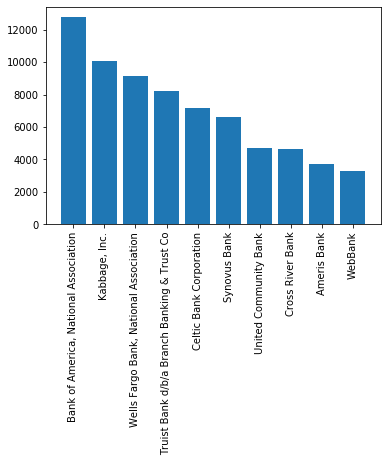

In [51]:
banks_most_loans=PPP_data["Lender"].value_counts()
number_of_applications=PPP_data.groupby("Lender").nunique()
averageLoanAmount=PPP_data.groupby('Lender').mean()["Loan Amount"]
averageJobsRetained=PPP_data.groupby('Lender').mean()['JobsRetained']
# print(averageLoanAmount)
# print(averageJobsRetained)
# banks_most_loans.head()
# Create bins in which to place values based upon Loan Amounts
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
# Create labels for these bins
labels = ["<$25K", "<$50K","<$75K", "<$100K","<$125K", "<$150K"]
top_ten_banks=banks_most_loans.head(10)
#top_ten_applictions=banks_that_loaned.head(10)
top_ten_banks_df=pd.DataFrame(top_ten_banks)
top_ten_banks_df
x=top_ten_banks_df.index
y=top_ten_banks_df["Lender"]
plt.bar(x,y)
plt.xticks(x, rotation="vertical")

In [39]:
# Slice the data and place it into bins
LoanAmount_s = pd.cut(PPP_data["Loan Amount"], bins, labels=labels)

In [40]:
# Place the data series into a new column inside of the DataFrame
PPP_data["Group of Loan Amounts"] = LoanAmount_s
PPP_data

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
0,149998.30,DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,None,14.0,4/14/2020,Newton Federal Bank,GA - 04,<$150K
1,149981.92,BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01,<$150K
2,149952.00,ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,14.0,6/18/2020,WebBank,GA - 04,<$150K
3,149952.00,DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,11.0,6/20/2020,WebBank,GA - 04,<$150K
4,149924.00,ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,None,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06,<$150K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138514,2.00,MARIETTA,GA,30067,445110.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,5.0,4/30/2020,"Bank of America, National Association",GA - 06,<$25K
138515,1.00,ATLANTA,GA,30339,236115.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,1.0,5/29/2020,"Bank of America, National Association",GA - 06,<$25K
138516,1.00,SAVANNAH,GA,31415,485119.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,0.0,5/15/2020,"Wells Fargo Bank, National Association",GA - 01,<$25K
138517,0.00,GAINESVILLE,GA,30504,561990.0,Corporation,Unanswered,Unanswered,Unanswered,None,2.0,5/3/2020,"Bank of America, National Association",GA - 09,NaN


In [61]:
top_job_retainers=PPP_data.sort_values("JobsRetained",ascending=False)

top_ten_job_retainers=top_ten_job_retainers.head(25)

top_ten_job_retainers

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
16309,75000.00,ALBANY,GA,31707,812990.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,None,500.0,4/15/2020,"Readycap Lending, LLC",GA - 02,<$75K
103112,9500.00,STONE MOUNTAIN,GA,30083,611430.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/14/2020,"Bank of America, National Association",GA - 04,<$25K
115907,6250.00,AUGUSTA,GA,30815,811111.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,500.0,6/15/2020,Celtic Bank Corporation,GA - 12,<$25K
74044,18962.00,ATLANTA,GA,30331,444110.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,500.0,5/3/2020,"Bank of America, National Association",GA - 05,<$25K
53684,24877.00,DULUTH,GA,30096,722513.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/11/2020,"Bank of America, National Association",GA - 07,<$25K
54123,24500.00,DECATUR,GA,30030,811219.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,500.0,4/29/2020,Celtic Bank Corporation,GA - 04,<$25K
126435,3790.00,ATLANTA,GA,30344,485320.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/7/2020,Celtic Bank Corporation,GA - 05,<$25K
126596,3750.00,SUWANEE,GA,30024,711510.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,500.0,5/6/2020,"Bank of America, National Association",GA - 06,<$25K
115604,6270.00,THOMASTON,GA,30286,447110.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/2/2020,"Kabbage, Inc.",GA - 03,<$25K
98883,10497.09,NORCROSS,GA,30093,524210.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,500.0,5/12/2020,Celtic Bank Corporation,GA - 04,<$25K


In [74]:
PPP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138519 entries, 0 to 138518
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Loan Amount            138519 non-null  float64 
 1   City                   138519 non-null  object  
 2   State                  138519 non-null  object  
 3   Zip                    138519 non-null  int64   
 4   NAICSCode              138519 non-null  float64 
 5   BusinessType           138486 non-null  object  
 6   RaceEthnicity          138519 non-null  object  
 7   Gender                 138519 non-null  object  
 8   Veteran                138519 non-null  object  
 9   NonProfit              3832 non-null    object  
 10  JobsRetained           138519 non-null  float64 
 11  DateApproved           138519 non-null  object  
 12  Lender                 138519 non-null  object  
 13  CD                     138519 non-null  object  
 14  Group of Loan Amount

In [100]:
#for companies that reported some jobs
clean_job_retainers = worst_job_retainers[worst_job_retainers["JobsRetained"] > 0]
clean_job_retainers["JobsRetained"].value_counts()
sorted_clean_jobs = clean_job_retainers.sort_values(by="JobsRetained",ascending=True)
sorted_clean_jobs
one_job_saved_df = sorted_clean_jobs[sorted_clean_jobs["JobsRetained"] == 1]
one_job_saved_df
one_job_saved_df.sort_values("Loan Amount", ascending=False).head(25)


,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
340,146787.25,ROSWELL,GA,30075,5.415120e+05,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,1.0,4/11/2020,Truist Bank d/b/a Branch Banking & Trust Co,GA - 06,<$150K
1489,138055.00,ROCHELLE,GA,31079,5.619900e+05,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,1.0,4/13/2020,Colony Bank,GA - 08,<$150K
2099,133866.02,TYBEE ISLAND,GA,31328,5.312100e+05,Corporation,Unanswered,Unanswered,Unanswered,None,1.0,4/29/2020,Synovus Bank,GA - 01,<$150K
2570,130700.00,GRIFFIN,GA,30224,2.123210e+05,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,None,1.0,4/9/2020,United Bank,GA - 03,<$150K
2740,129822.00,LOGANVILLE,GA,30052,5.241280e+05,Sole Proprietorship,Black or African American,Unanswered,Unanswered,None,1.0,4/29/2020,"Harvest Small Business Finance, LLC",GA - 04,<$150K
3394,125510.00,ELBERTON,GA,30635,2.123190e+05,Corporation,Unanswered,Male Owned,Non-Veteran,None,1.0,4/10/2020,Northeast Georgia Bank,GA - 09,<$150K
3474,125000.00,LAWRENCEVILLE,GA,30045,6.211110e+05,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,1.0,4/29/2020,"Heritage Bank, A Division of",GA - 07,<$125K
3896,122842.00,CANTON,GA,30115,5.416110e+05,Corporation,Unanswered,Unanswered,Unanswered,None,1.0,4/29/2020,First Bank of the Lake,GA - 11,<$125K
4670,118512.00,SMYRNAATLANTA,GA,30339,5.613300e+05,Corporation,Asian,Male Owned,Non-Veteran,None,1.0,5/27/2020,"BSD Capital, LLC dba Lendistry",GA - 06,<$125K
4703,118300.00,ATLANTA,GA,30309,5.411100e+05,Corporation,Unanswered,Unanswered,Unanswered,None,1.0,4/30/2020,Truist Bank d/b/a Branch Banking & Trust Co,GA - 05,<$125K
